Predicting Prices Using Random Forest
a. Objective: Build a Random Forest model to predict prices based on historical data and
technical indicators.
b. Focus: Machine learning, feature engineering, and model evaluation.

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to compute RSI
def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Step 1: Load the dataset
df = pd.read_csv("USDJPY_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv")
df['Local time'] = pd.to_datetime(df['Local time'], format="%d.%m.%Y %H:%M:%S.%f GMT%z", utc=True)

# Step 2: Feature engineering
df['hour'] = df['Local time'].dt.hour
df['day_of_week'] = df['Local time'].dt.dayofweek
df['moving_average_10'] = df['Close'].rolling(window=10).mean()
df['rsi'] = compute_rsi(df['Close'])

# Step 3: Prepare data
df.dropna(inplace=True)  # Drop any rows with missing values

# Features and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'hour', 'day_of_week', 'moving_average_10', 'rsi']]
y = df['Close'].shift(-1).dropna()

# Align X and y
X = X.iloc[:-1]

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 0.1737


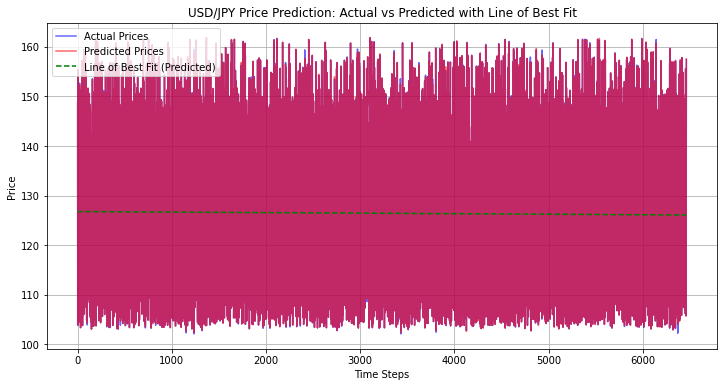

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Prices', color='red', alpha=0.6)

# Step 2: Add a line of best fit for the predicted prices
# Create indices for the predicted prices
indices = np.arange(len(y_pred))
# Fit a polynomial (degree 1 for linear)
z = np.polyfit(indices, y_pred, 1)
p = np.poly1d(z)
plt.plot(indices, p(indices), label='Line of Best Fit (Predicted)', color='green', linestyle='--')

# Step 3: Adding titles and labels
plt.title('USD/JPY Price Prediction: Actual vs Predicted with Line of Best Fit')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Step 4: Show the plot
plt.show()
